<a href="https://colab.research.google.com/github/yochaipagi/MlSpamDetactionSemniar/blob/main/Spam_dedaction_using_machine_learning_seminar_2024_b_the_openU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **תיאור הפרויקט**
# מגיש: יוחאי פגי
כעת, כפי שהבטחנו, ניגש לגולת הכותרת של הסמינריון והיא מימוש מודל לזיהוי דואר זבל. בפרק זה נציג את תהליך המימוש של המודל צעד אחר צעד, תוך שימוש בסביבת Google Colab. נעבור על כל שלבי הפיתוח, החל מעיבוד הנתונים הגולמיים ועד לאימון המודל הסופי והערכת ביצועיו. תהליך זה ידגים את היישום המעשי של העקרונות התיאורטיים שנדונו בחלקים הקודמים של הסמינריון, ויספק תובנות מעשיות לגבי האתגרים והפתרונות בפיתוח מערכת לזיהוי דואר זבל.
לשם נוחות והתמיכה הלקויה של הפלטפורמה הזאת
בשילוב עברית נכתוב את המשך המעבדה באנגלית



# Project Description and Workflow Process:
Objective:
The goal of this project is to develop a robust machine learning model capable of accurately identifying spam emails. We will implement and compare various algorithms to determine the most effective approach for this task
# Workflow:
Data Preprocessing:
 As we discussed in the data preparation section. This stage directly relates to the principles of handling raw data and preparing it for use in machine learning models.


*   Data Loading: We'll use pandas to load the data file into the working environment.
*   Data Cleaning: We'll remove missing or erroneous values and handle outliers if present.
*   Text Normalization: We'll perform operations such as removing special characters, converting to lowercase, and removing stop words.
*   Tokenization: We'll break down the text into individual words or bigrams (pairs of words).

Feature Extraction:
Feature extraction is a central process in machine learnin. In spam detection, this is particularly related to methods of representing text as numerical vectors.

*   TF-IDF (Term Frequency-Inverse Document Frequency): We'll use this method to convert text into numerical features.
*   Feature Selection: We'll use methods like chi-squared test to select the most significant features.

Data Splitting:
Data splitting is a fundamental principle in machine learning, as we discussed in the model evaluation section. This relates to ideas of avoiding overfitting and ensuring the model's generalization ability.

*   We'll split the data into training and testing sets, typically in an 80:20 ratio.
*   We'll use stratified sampling to maintain the ratio of spam to non-spam messages in each group.

Model Training:
Model training is the core of the learning process, as we learned in the sections dealing with specific algorithms. We will try diffrent algorithems and evaluate tham. Each of these models represents a different approach to learning from data.

We'll train several different models:
* SVM (Support Vector Machine)
* decision tree
* Simple Neural Network

Model Evaluation:
We will plot different mertics to compare the 2 different models that we train.
*   We'll calculate performance metrics for each model: Accuracy, Precision, Recall, and F1-score.
*   We'll use a confusion matrix for a deeper understanding of the types of errors each model makes.

Hyperparameter Tuning:
Hyperparameter tuning is an advanced process in machine learning, relating to ideas of optimization and improving model performance. This demonstrates the importance of choosing the right parameters.


*   We'll use GridSearchCV or RandomizedSearchCV to search for optimal hyperparameter values.
*   We'll perform cross-validation to ensure the model generalizes well.

Final Model Selection and Validation:
Selecting and validating the final model relates to ideas of model comparison
and assessing generalization ability, as we discussed in the sections on model selection and performance evaluation on new data.

*   We'll select the model with the best performance, considering various performance metrics.
*   We'll retrain the chosen model on all training data.
*   We'll check the final model's performance on the test set.









Error Analysis and Summary:
Error analysis and process summary relate to ideas of critical evaluation and continuous improvement, as we discussed in the section on interpreting results and further model development.
*   We'll examine examples of incorrectly classified messages.
*   We'll analyze the reasons for these errors and consider ways to improve the model.
*   We'll summarize the process and the performance of the final model.
*   We'll discuss the advantages and disadvantages of our chosen approach.









# Data Preprocessing section

### import libraries

In [2]:
!pip install --upgrade scikit-learn
!pip install --upgrade scikeras

In [1]:
# Essential data processing libraries
import numpy as np
import pandas as pd

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support,
    roc_auc_score,
    roc_curve
)

# Text processing tools
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Model selection and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Machine learning models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
!pip install scikeras
# For Keras model compatibility with sklearn
from scikeras.wrappers import KerasClassifier

# Pipeline for streamlined workflow
from sklearn.pipeline import make_pipeline

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Enable inline plotting for colab notebooks
%matplotlib inline

# Print TensorFlow version for reference
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.17.0


### Load the dataset

In [2]:
# Load the spam ham Dataset
#we will use kaggle community for the dataset of spam ham
df = pd.read_csv("https://raw.githubusercontent.com/yochaipagi/MlSpamDetactionSemniar/main/spam.csv", encoding='latin-1')


### Quick look on the data

In [3]:
# Display the first few rows of the dataset to verify it loaded correctly
print(df.head())

# Check the shape of the dataframe
print(f"Dataset shape: {df.shape}")


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Dataset shape: (5572, 5)


### Lets break down the dataset information

In [4]:
print("=== Dataset Overview ===")
# Dataset Rows & Columns count
print("\n1. Dataset Dimensions:")
print(f"   Number of rows: {df.shape[0]}")
print(f"   Number of columns: {df.shape[1]}")

# Dataset Info
print("\n2. Dataset Information:")
print(df.info())

# Dataset Duplicate Value Count
print("\n3. Duplicate Rows:")
dup = df.duplicated().sum()
print(f"   Number of duplicated rows: {dup}")
print(f"   Percentage of duplicates: {(dup/df.shape[0])*100:.2f}%")

# Missing Values/Null Values Count
print("\n4. Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\n   Total missing values: {missing_values.sum()}")
print(f"   Percentage of missing data: {(missing_values.sum()/(df.shape[0]*df.shape[1]))*100:.2f}%")

# Display unique values in each column
print("\n5. Unique Values in Each Column:")
for column in df.columns:
    print(f"   {column}: {df[column].nunique()} unique values")

print("\n=== End of Dataset Overview ===")

=== Dataset Overview ===

1. Dataset Dimensions:
   Number of rows: 5572
   Number of columns: 5

2. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None

3. Duplicate Rows:
   Number of duplicated rows: 403
   Percentage of duplicates: 7.23%

4. Missing Values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

   Total missing values: 16648
   Percentage of missing data: 59.76%

5. Unique Values in Each Column:
   v1: 2 unique values
   v2: 5169 unique values
   Unnamed: 2: 43 unique values
   Unnamed: 3: 10 unique values
   Unnamed:

### Conclusion about the data

* The spam detection dataset comprises 5,572 entries, each containing a message and its corresponding category.
* The dataset consists of 5 columns, with 'v1' and 'v2' likely representing the category and message text, respectively.
* There are 403 duplicate rows in the dataset, accounting for 7.23% of the total entries.
* The primary columns 'v1' and 'v2' are completely populated with no null values. and  contain the spam/ham and the email text

### Data Preprocessing and Refinement

In this phase, we will refine our dataset to optimize it for spam detection modeling:

* Feature Selection: We will retain only the essential columns, eliminating extraneous features that lack significant informational value.
* Column Renaming: To enhance clarity, we will assign more descriptive names to our primary features.
* Binary Classification Encoding: We will introduce a new binary indicator for spam classification, facilitating easier model training and evaluation.

In [5]:
print("=== Data Preprocessing Steps ===")

# Step 1: Rename columns for clarity
print("\n1. Renaming Columns:")
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)
print("   Columns 'v1' and 'v2' renamed to 'Category' and 'Message'")

# Step 2: Remove unnecessary columns
print("\n2. Removing Irrelevant Columns:")
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns=columns_to_drop, inplace=True)
print(f"   Removed columns: {', '.join(columns_to_drop)}")

# Step 3: Create binary spam indicator
print("\n3. Creating Binary Spam Indicator:")
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
print("   New 'Spam' column created: 1 for spam, 0 for ham")

# Display updated dataset info
print("\n4. Updated Dataset Information:")
print(df.info())

# Show the first few rows of the processed dataset
print("\n5. Preview of Processed Dataset:")
print(df.head())

print("\n=== End of Data Preprocessing ===")

=== Data Preprocessing Steps ===

1. Renaming Columns:
   Columns 'v1' and 'v2' renamed to 'Category' and 'Message'

2. Removing Irrelevant Columns:
   Removed columns: Unnamed: 2, Unnamed: 3, Unnamed: 4

3. Creating Binary Spam Indicator:
   New 'Spam' column created: 1 for spam, 0 for ham

4. Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
 2   Spam      5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB
None

5. Preview of Processed Dataset:
  Category                                            Message  Spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U du

###Now we can safely work with the data

# Data Vizualization section

We'll now look closely at our data to better understand what it tells us about spam messages. By creating charts and calculating some numbers, we'll try to find useful patterns that can help us build a good spam detector.

* Visualize the distribution of spam vs. ham messages to understand class balance


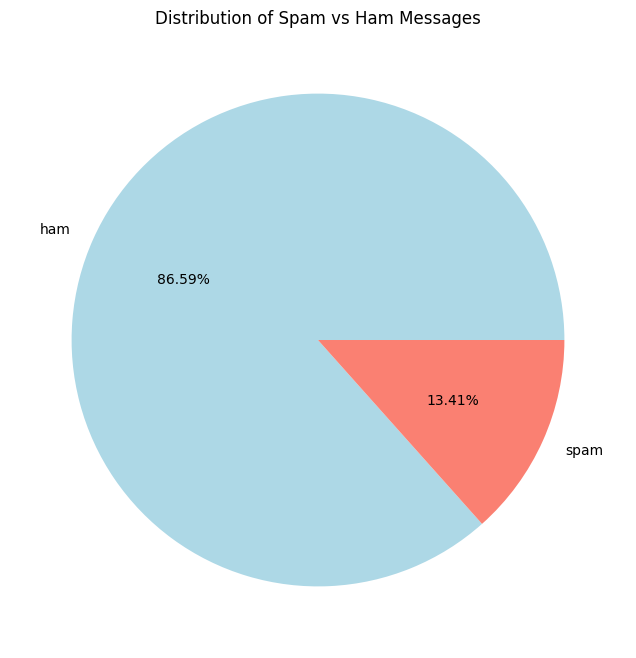

In [6]:
# Visualize the distribution of spam vs. ham messages to understand class balance
plt.figure(figsize=(8, 8))
df['Category'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['lightblue', 'salmon'])
plt.title('Distribution of Spam vs Ham Messages')
plt.ylabel('')  # Remove y-label for cleaner look
plt.show()

* Most Used Words in Spam Messages

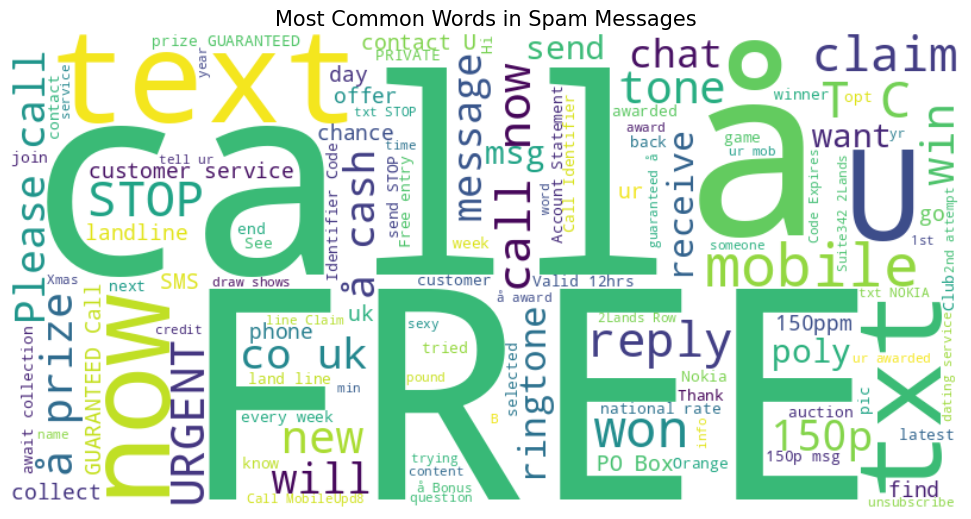

In [7]:
# Create a word cloud to visualize the most common words in spam messages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter spam messages
spam_messages = df[df['Category'] == 'spam']['Message']

# Combine all spam messages into a single string
all_words = ' '.join(spam_messages)

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(all_words)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Spam Messages', fontsize=15)
plt.tight_layout(pad=0)
plt.show()

### we can easily understand thet 'free', 'call', 'text', 'txt' and 'now' are most used words in spam messages.

# Data splitting
* we will split the data to 80% for train and 20% for testing

In [8]:
# Split the dataset into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df['Message']
y = df['Spam']

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 4457 samples
Testing set size: 1115 samples


# Model implemention section

## Evaluation function

The evaluate_model function is a comprehensive tool designed to assess the performance of our spam detection models. It calculates key metrics such as accuracy, precision, and recall, while also providing visual representations of the model's performance through ROC curves and confusion matrices, enabling us to thoroughly analyze and compare different classification approaches.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score, f1_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluate the model's performance on both training and test sets.
    This function is designed to work with SVM, Decision Tree, and Neural Network models.
    """
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Handle probability predictions
    if hasattr(model, "predict_proba"):
        y_prob_train = model.predict_proba(X_train)[:, 1]
        y_prob_test = model.predict_proba(X_test)[:, 1]
    else:
        if hasattr(model, "decision_function"):
            y_prob_train = model.decision_function(X_train)
            y_prob_test = model.decision_function(X_test)
        else:
            y_prob_train = y_pred_train
            y_prob_test = y_pred_test

    # Calculate ROC AUC scores
    roc_auc_train = roc_auc_score(y_train, y_prob_train)
    roc_auc_test = roc_auc_score(y_test, y_prob_test)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    for X, y, y_prob, label in [(X_train, y_train, y_prob_train, 'Train'),
                                (X_test, y_test, y_prob_test, 'Test')]:
        fpr, tpr, _ = roc_curve(y, y_prob)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y, y_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Plot confusion matrices
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    for ax, y_true, y_pred, title in zip([ax1, ax2],
                                         [y_train, y_test],
                                         [y_pred_train, y_pred_test],
                                         ['Train', 'Test']):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
        ax.set_title(f'{title} Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Print classification reports
    for dataset, y_true, y_pred in zip(['Train', 'Test'],
                                       [y_train, y_test],
                                       [y_pred_train, y_pred_test]):
        print(f'\n{dataset} Classification Report:')
        print(classification_report(y_true, y_pred))

    # Calculate and return metrics
    metrics = ['precision', 'recall', 'accuracy', 'roc_auc', 'f1']
    results = {}
    for metric in metrics:
        for dataset, y_true, y_pred, y_prob in zip(['train', 'test'],
                                                   [y_train, y_test],
                                                   [y_pred_train, y_pred_test],
                                                   [y_prob_train, y_prob_test]):
            if metric == 'accuracy':
                score = accuracy_score(y_true, y_pred)
            elif metric == 'roc_auc':
                score = roc_auc_score(y_true, y_prob)
            elif metric == 'f1':
                score = f1_score(y_true, y_pred, average='weighted')
            else:
                score = float(classification_report(y_true, y_pred, output_dict=True)['weighted avg'][metric])
            results[f'{metric}_{dataset}'] = score

    return results

# Key differences in evaluation:
# 1. Probability Estimation:
#    - SVM: Uses decision_function which returns decision boundaries, not probabilities.
#    - Decision Tree: Can use predict_proba to get class probabilities directly.
#    - Neural Network: Uses predict_proba to get class probabilities.
#
# 2. ROC AUC Calculation:
#    - For SVM, we use the decision function outputs as scores for ROC AUC.
#    - For Decision Tree and Neural Network, we use the probability estimates directly.
#
# 3. Interpretation of Outputs:
#    - SVM: The decision_function output is not a probability, but a distance from the decision boundary.
#    - Decision Tree & Neural Network: Output actual probability estimates.
#
# 4. Threshold Adjustment:
#    - For SVM, adjusting classification threshold means changing the decision boundary.
#    - For Decision Tree and Neural Network, it's straightforward to adjust the probability threshold.

## First model implementation - Support Vector Machine:

In [10]:
# ML Model Implementation: Support Vector Machine (SVM)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Create a machine learning pipeline using scikit-learn, combining text vectorization (TfidfVectorizer)
# and a Support Vector Machine classifier for email spam detection.
svm_clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Step 1: Text data transformation
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))  # Step 2: Classification using SVM
])

print("SVM model pipeline created.")
print("The model will be trained and evaluated using the evaluate_model function.")

# Note: Model training and prediction will be handled by the evaluate_model function

SVM model pipeline created.
The model will be trained and evaluated using the evaluate_model function.


## Second model implementation - Decision Tree:

In [11]:
# ML Model Implementation: Decision Tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Create a machine learning pipeline using scikit-learn, combining text vectorization (TfidfVectorizer)
# and a Decision Tree classifier for email spam detection.
dt_clf = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000)),  # Step 1: Text data transformation
    ('dt', DecisionTreeClassifier(random_state=42, max_depth=10))  # Step 2: Classification using Decision Tree
])

print("Decision Tree model pipeline created.")
print("The model will be trained and evaluated using the evaluate_model function.")

# Note: Model training and prediction will be handled by the evaluate_model function

Decision Tree model pipeline created.
The model will be trained and evaluated using the evaluate_model function.


##Third model implementation - Simple Neural Network:

In [12]:
# ML Model Implementation: Simple Neural Network
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

# Define the neural network architecture
def create_nn_model(input_dim):
    """
    Creates a simple feedforward neural network for binary classification.

    Args:
    input_dim (int): The dimensionality of the input features.

    Returns:
    A compiled Keras Sequential model.
    """
    model = Sequential([
        # Input layer: 64 neurons, ReLU activation, expects input_dim features
        Dense(64, activation='relu', input_shape=(input_dim,)),

        # Dropout layer: randomly sets 50% of inputs to 0 during training to prevent overfitting
        Dropout(0.5),

        # Hidden layer: 32 neurons with ReLU activation
        Dense(32, activation='relu'),

        # Another dropout layer for further regularization
        Dropout(0.5),

        # Output layer: 1 neuron with sigmoid activation for binary classification
        # Sigmoid squashes the output between 0 and 1, representing the probability of spam
        Dense(1, activation='sigmoid')
    ])

    # Compile the model:
    # - Adam optimizer: an adaptive learning rate optimization algorithm
    # - Binary crossentropy loss: suitable for binary classification problems
    # - Accuracy metric: to monitor the model's performance during training
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create a machine learning pipeline using scikit-learn and Keras
nn_clf = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000)),  # Step 1: Text data transformation
    ('nn', KerasClassifier(model=create_nn_model, input_dim=5000,
                           epochs=10, batch_size=32, verbose=0))  # Step 2: Neural Network classifier
])

print("Simple Neural Network model pipeline created.")
print("The model will be trained and evaluated using the evaluate_model function.")

# Note: Model training and prediction will be handled by the evaluate_model function

Simple Neural Network model pipeline created.
The model will be trained and evaluated using the evaluate_model function.


## Evaluation of Machine Learning Models for Spam Detection
* In this section, we will assess the performance of three distinct machine learning models:
* Support Vector Machine (SVM), Decision Tree, and Neural Network. By applying these diverse algorithms to our spam detection task, we aim to compare their effectiveness and identify the most suitable approach for our specific dataset.
* We will use the same evaluate function that we wrote before




Evaluating SVM model:


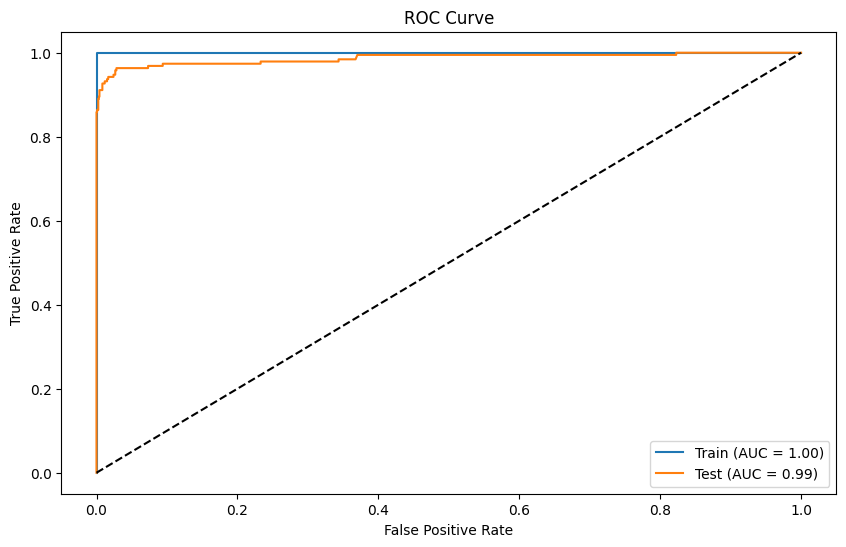

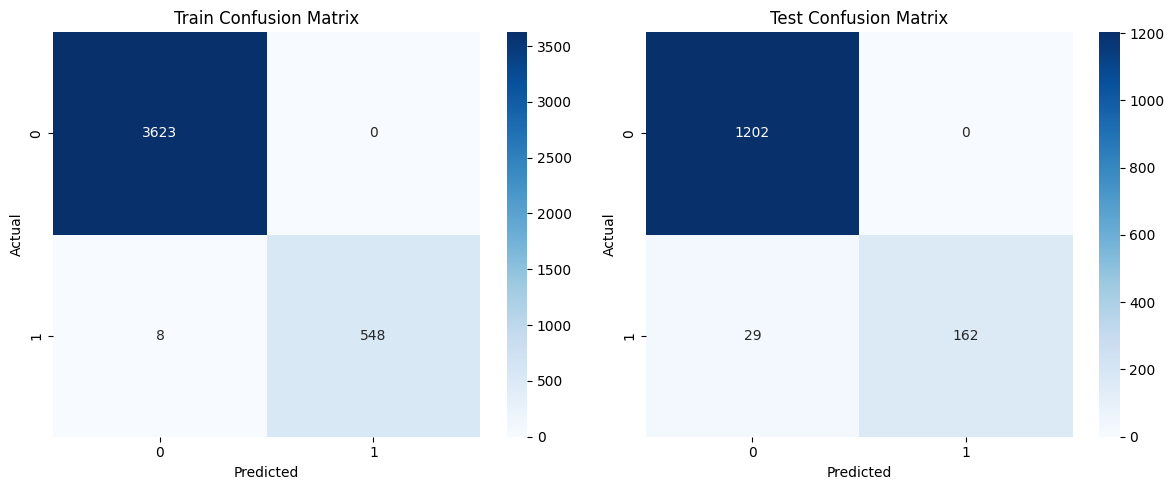


Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3623
           1       1.00      0.99      0.99       556

    accuracy                           1.00      4179
   macro avg       1.00      0.99      1.00      4179
weighted avg       1.00      1.00      1.00      4179


Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       1.00      0.85      0.92       191

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393

SVM Results: {'precision_train': 0.9980898841824234, 'precision_test': 0.9796720634622574, 'recall_train': 0.998085666427375, 'recall_test': 0.9791816223977028, 'accuracy_train': 0.998085666427375, 'accuracy_test': 0.9791816223977028, 'roc_auc_train': 1.0, 'roc_auc_test': 0.986871793084

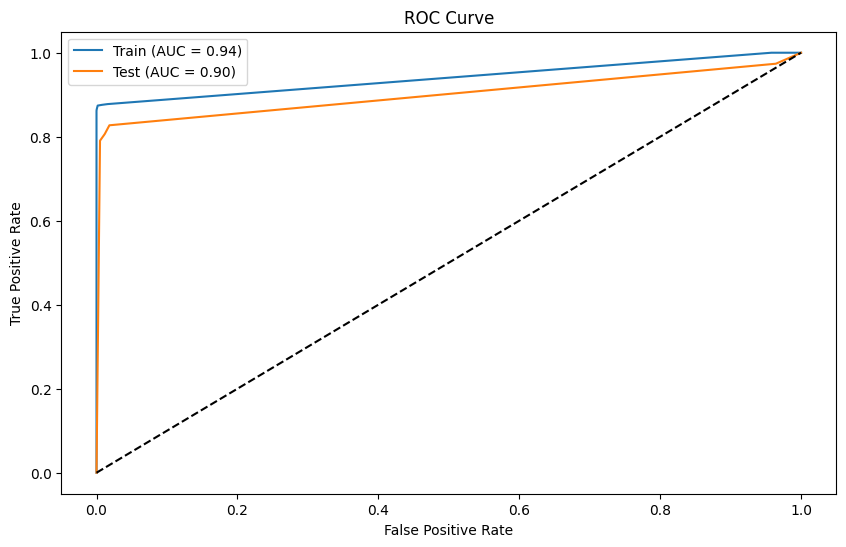

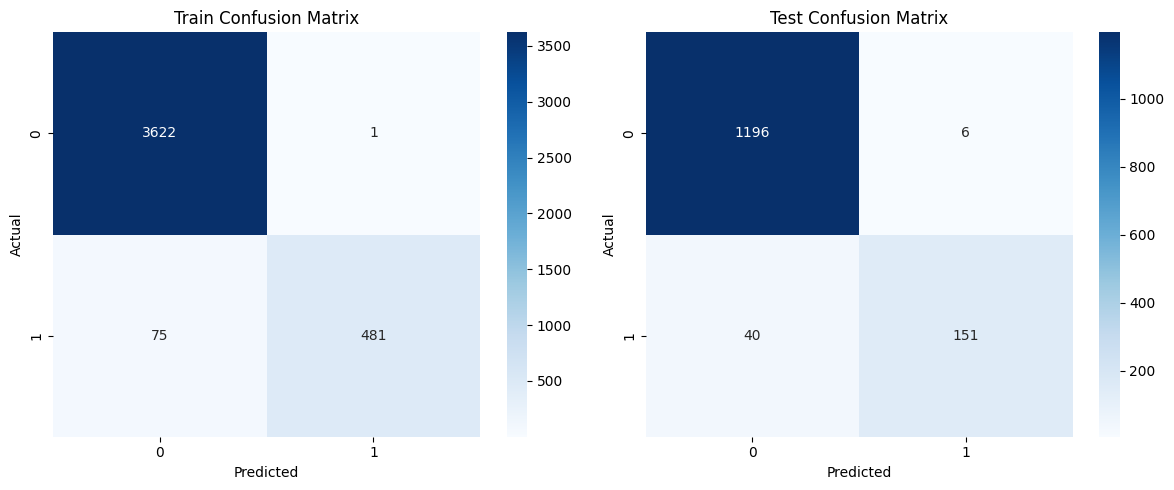


Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3623
           1       1.00      0.87      0.93       556

    accuracy                           0.98      4179
   macro avg       0.99      0.93      0.96      4179
weighted avg       0.98      0.98      0.98      4179


Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1202
           1       0.96      0.79      0.87       191

    accuracy                           0.97      1393
   macro avg       0.96      0.89      0.92      1393
weighted avg       0.97      0.97      0.97      1393

Decision Tree Results: {'precision_train': 0.9821363221421832, 'precision_test': 0.9668348604215871, 'recall_train': 0.9818138310600623, 'recall_test': 0.9669777458722182, 'accuracy_train': 0.9818138310600623, 'accuracy_test': 0.9669777458722182, 'roc_auc_train': 0.9404136641004611, 'ro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


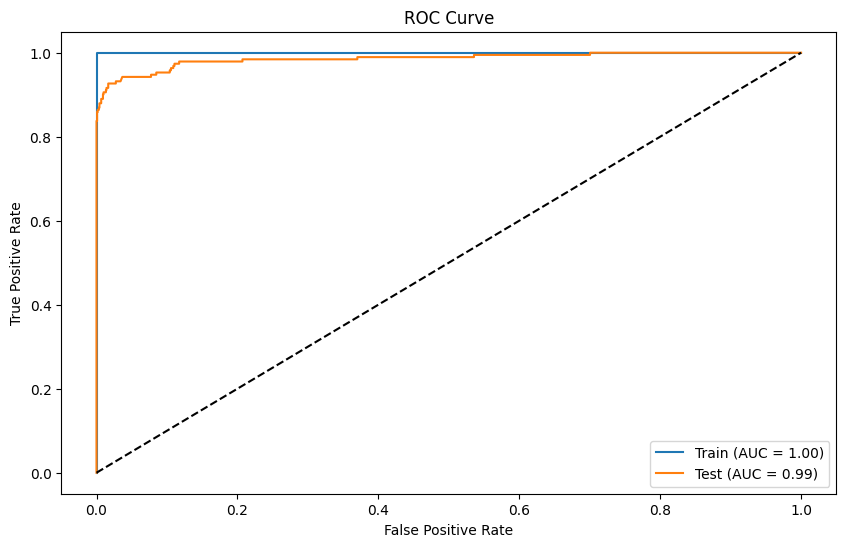

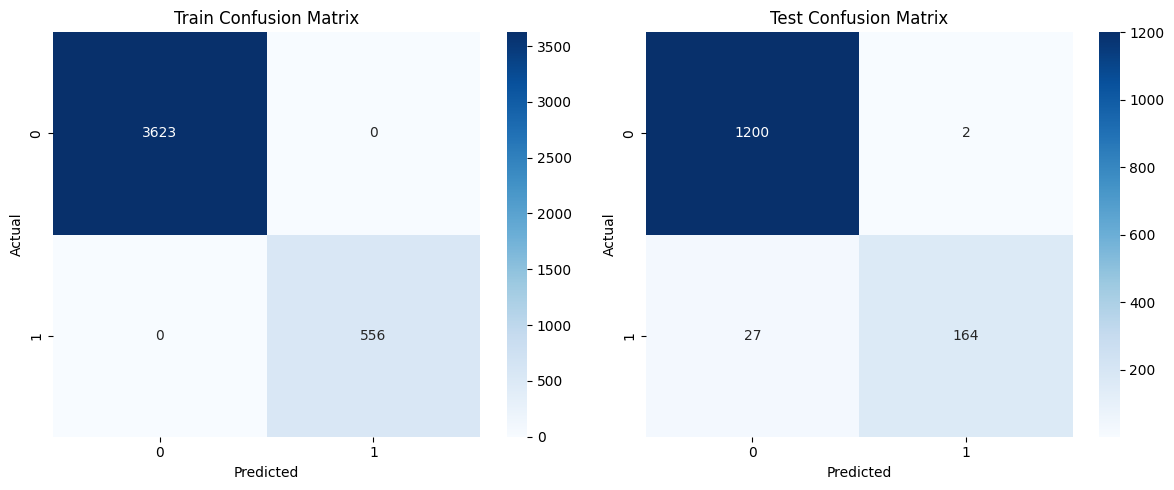


Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3623
           1       1.00      1.00      1.00       556

    accuracy                           1.00      4179
   macro avg       1.00      1.00      1.00      4179
weighted avg       1.00      1.00      1.00      4179


Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       0.99      0.86      0.92       191

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393

Neural Network Results: {'precision_train': 1.0, 'precision_test': 0.9793603140201808, 'recall_train': 1.0, 'recall_test': 0.9791816223977028, 'accuracy_train': 1.0, 'accuracy_test': 0.9791816223977028, 'roc_auc_train': 1.0, 'roc_auc_test': 0.9856565410180241, 'f1_train': 1.0, 'f1_test'

In [13]:
# Evaluation of Machine Learning Models for Spam Detection

import numpy as np
from sklearn.model_selection import train_test_split

# Prepare the dataset for model evaluation
X = df['Message']  # Feature: email content
y = df['Spam']     # Target: spam classification (1 for spam, 0 for non-spam)

# Split data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the models to be evaluated
models = [
    ("SVM", svm_clf),
    ("Decision Tree", dt_clf),
    ("Neural Network", nn_clf)
]

# Dictionary to store evaluation results for each model
results = {}

# Evaluate each model
for name, model in models:
    print(f"\nEvaluating {name} model:")

    # Use our custom evaluate_model function to assess model performance
    model_results = evaluate_model(model, X_train, X_test, y_train, y_test)

    # Store results for later comparison
    results[name] = model_results

    print(f"{name} Results:", model_results)

# Compare model performances across different metrics
print("\n=== Model Comparison ===")
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

for metric in metrics:
    print(f"\n{metric.capitalize()} scores:")
    for model_name in results:
        train_score = results[model_name][f'{metric}_train']
        test_score = results[model_name][f'{metric}_test']
        print(f"{model_name}: Train = {train_score:.4f}, Test = {test_score:.4f}")

# The above comparison allows us to assess each model's performance on both training and test data,
# helping to identify any overfitting or underfitting issues and determine the most effective
# algorithm for our spam detection task.

## Conclusion

Based on these results, the Neural Network model appears to be the top performer, achieving perfect scores on the training set and the highest overall scores on the test set. The SVM model closely follows with excellent performance, while the Decision Tree model, although still performing well, shows slightly lower scores across all metrics compared to the other two models.

## Email Spam Detection System

###We will use the Nueral Network model because the conclution above.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def detect_spam(email_text):
    # Use the entire pipeline to transform the input and make a prediction
    prediction = nn_clf.predict([email_text])

    # The prediction will be a numpy array, so we need to check its value
    if prediction[0] < 0.5:  # Assuming 0.5 as the threshold
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"

# Example usage:
# result = detect_spam("Your email text here")
# print(result)

Here in the sample_email var we can type any string and pretict if its ham or spam.

In [15]:
# Example of how to use the function
sample_email = 'New Free tickets to Maccabi game!'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!


# And we got ourself the ML model!